## Importing the relevant libraries

In [58]:
# Importing the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

## Preparing the Data

### Importing the data

In [8]:
data = pd.read_csv("segmentation data.csv")

### Exploring the dataset

In [9]:
# Looking at the first 10 rows of the data
data.head(10)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
5,100000006,0,0,35,1,144848,0,0
6,100000007,0,0,53,1,156495,1,1
7,100000008,0,0,35,1,193621,2,1
8,100000009,0,1,61,2,151591,0,0
9,100000010,0,1,28,1,174646,2,0


In [10]:
# Dropping the ID columns
data= data.drop(columns=["ID"])
data.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


In [11]:
# Checking some characteristics about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB


In [12]:
# Verifying if there are missing values
data.isnull().sum()

Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [22]:
# Using the variance to determine the features to choose
variances= data.var().sort_values().tail()
print(variances)

Education          3.597359e-01
Occupation         4.077936e-01
Settlement size    6.602091e-01
Age                1.373444e+02
Income             1.452283e+09
dtype: float64


In [24]:
high_var_cols = variances.tail(2).index.to_list()
high_var_cols

['Age', 'Income']

## Splitting the DataSet

In [26]:
X = data[high_var_cols]
print("X type:", type(X))
print("X shape:", X.shape)
X.head()

X type: <class 'pandas.core.frame.DataFrame'>
X shape: (2000, 2)


,Age,Income
0,67,124670
1,22,150773
2,49,89210
3,45,171565
4,53,149031


### Building the model

In [27]:
# Standardizing the data

# Instantiate transformer
ss = StandardScaler()

# Transform X
X_scaled_data = ss.fit_transform(X)

# Put X_scaled_data into DataFrame
X_scaled = pd.DataFrame(X_scaled_data, columns=X.columns)

print("X_scaled type:", type(X_scaled))
print("X_scaled shape:", X_scaled.shape)
X_scaled.head()

X_scaled type: <class 'pandas.core.frame.DataFrame'>
X_scaled shape: (2000, 2)


,Age,Income
0,2.653614,0.097524
1,-1.187132,0.782654
2,1.117316,-0.833202
3,0.775916,1.328386
4,1.458716,0.736932


In [29]:
# Verifying if what I did was right
X_scaled_summary = X_scaled.aggregate(["mean", "std"]).astype(int)

print("X_scaled_summary type:", type(X_scaled_summary))
print("X_scaled_summary shape:", X_scaled_summary.shape)
X_scaled_summary

X_scaled_summary type: <class 'pandas.core.frame.DataFrame'>
X_scaled_summary shape: (2, 2)


,Age,Income
mean,0,0
std,1,1


In [34]:
# Looping to help produce the optimal number of clusters

n_clusters = range(2,13)
inertia_errors = []
silhouette_scores = []

# Add `for` loop to train model and calculate inertia, silhouette score.
for k in n_clusters:
    model = make_pipeline(StandardScaler(), KMeans(n_clusters=k, random_state=42))
    # Train model
    model.fit(X)
    # Calculate inertia
    inertia_errors.append(model.named_steps["kmeans"].inertia_)
    # Calculate silhouette score
    silhouette_scores.append(silhouette_score(X,model.named_steps["kmeans"].labels_)
    )

print("inertia_errors type:", type(inertia_errors))
print("inertia_errors len:", len(inertia_errors))
print("Inertia:", inertia_errors)
print()
print("silhouette_scores type:", type(silhouette_scores))
print("silhouette_scores len:", len(silhouette_scores))
print("Silhouette Scores:", silhouette_scores)

inertia_errors type: <class 'list'>
inertia_errors len: 11
Inertia: [2260.205865581239, 1647.5625374067326, 1281.1446885575556, 1024.2239108009765, 865.9919395524834, 751.1382689479246, 671.8502245400348, 583.5067827312067, 511.1819788983228, 460.1384088492367, 420.060727160104]

silhouette_scores type: <class 'list'>
silhouette_scores len: 11
Silhouette Scores: [0.323247625524123, 0.18376022753169058, 0.23844849261675302, 0.03379170680465983, 0.10355600760311379, 0.02748366128915319, 0.0337432562848238, 0.012159004734063074, -0.01841349454225736, -0.026434599071111665, 0.010295727830751663]


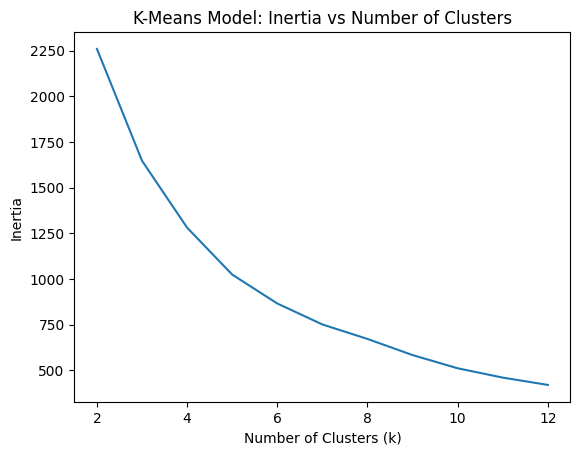

In [55]:
# Plot of inertia_errors vs n_clusters
plt.plot(n_clusters, inertia_errors)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("K-Means Model: Inertia vs Number of Clusters");

From the graph(also called the Elbow method), it can be seen that the optimal cluster size (k) is 3 or 4. But we will continue to use the Silhouette to see if we have same or at least closer clusters

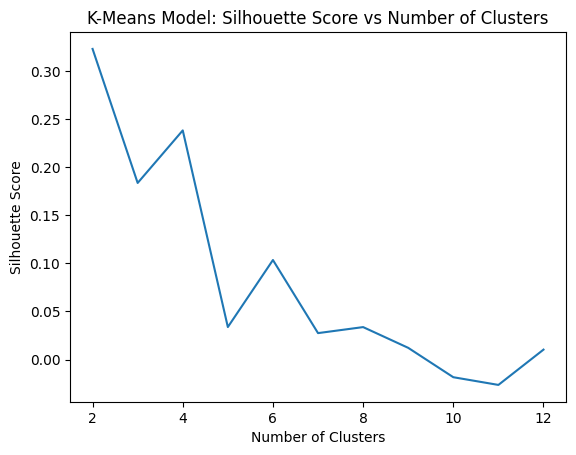

In [53]:
# Plot silhouette_scores vs n_clusters
plt.plot(n_clusters, silhouette_scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("K-Means Model: Silhouette Score vs Number of Clusters");

Over here, we can see that a cluster size(k) of 3 or 4 may be optimal

In [47]:
# Building model
final_model = KMeans(n_clusters=3, random_state=42)

# Fit model to data
final_model.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

## Communicating the Results

In [48]:
# Extracting the labels of the Kmeans
labels = final_model.labels_

print("labels type:", type(labels))
print("labels len:", len(labels))
print(labels[:5])

labels type: <class 'numpy.ndarray'>
labels len: 2000
[0 2 0 2 0]


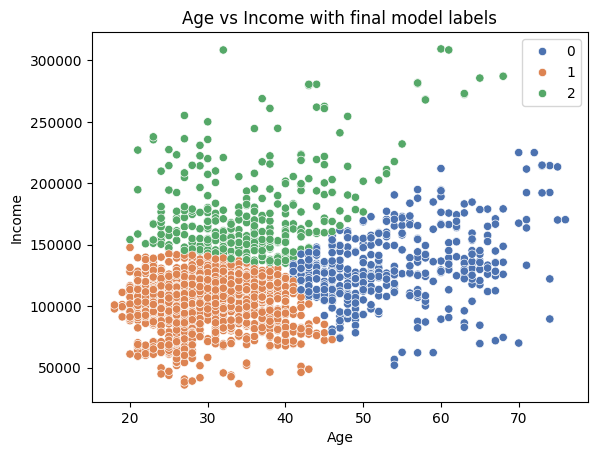

In [51]:
# Plot "HOUSES" vs "DEBT" with final_model labels
sns.scatterplot(
    x= data["Age"],
    y= data["Income"],
    hue= final_model.labels_,
    palette= "deep"
)
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Age vs Income with final model labels");